### Using Spotify Tracks DB - downloaded from Kaggle

# Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

df=pd.read_csv(r"C:\Users\Tanvi\Desktop\Datasets\SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

The data has no null columns

In [5]:
df.nunique()

genre                   27
artist_name          14564
track_name          148615
track_id            176774
popularity             101
acousticness          4734
danceability          1295
duration_ms          70749
energy                2517
instrumentalness      5400
key                     12
liveness              1732
loudness             27923
mode                     2
speechiness           1641
tempo                78512
time_signature           5
valence               1692
dtype: int64

# Check for any Missing values or Duplicates

In [6]:
print('shape of df : ',df.shape)
print('Duplicate rows : ',df.duplicated().sum())
print('Missing values:\n  ',df.isnull().sum())

shape of df :  (232725, 18)
Duplicate rows :  0
Missing values:
   genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


# Keeping Essential features 

#### I'll be keeping the numerical features like danceability, energy, tempo, loudness, acousticness, etc., as they describe how a song feels. These features are important for clustering songs into mood-based playlists like sad, romantic, retro, or party.On the other hand, textual features or columns like mode and time_signature don't contribute much to clustering and can be dropped. Features like genre or key would only be useful in a supervised learning setup, where they might act as target labels, but since this is an unsupervised task, we won't be using them here.

In [7]:
features_to_keep = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

new_df=df[features_to_keep]

In [8]:
new_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.389,0.910,-1.828,0.0525,0.611,0.000,0.3460,0.814,166.969,99373
1,0.590,0.737,-5.559,0.0868,0.246,0.000,0.1510,0.816,174.003,137373
2,0.663,0.131,-13.879,0.0362,0.952,0.000,0.1030,0.368,99.488,170267
3,0.240,0.326,-12.178,0.0395,0.703,0.000,0.0985,0.227,171.758,152427
4,0.331,0.225,-21.150,0.0456,0.950,0.123,0.2020,0.390,140.576,82625


# Computing the skewness for each feature in new_df

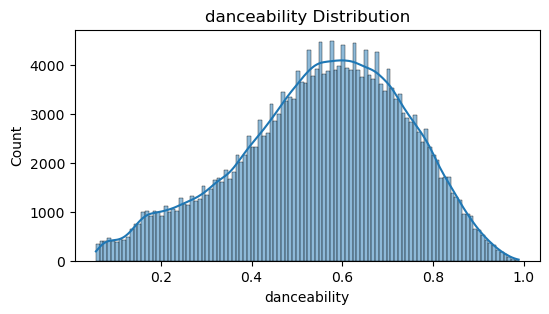

danceability skewness: -0.38


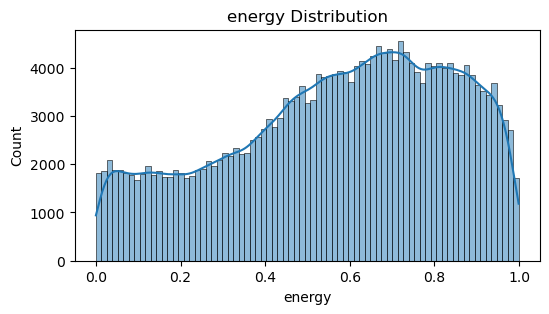

energy skewness: -0.40


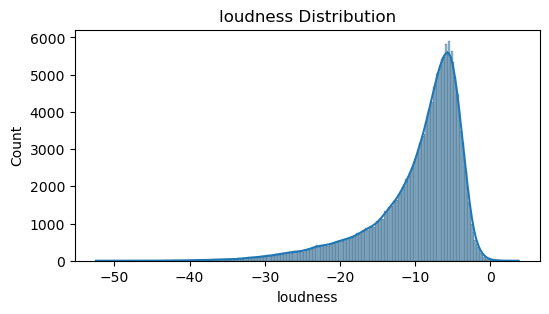

loudness skewness: -1.66


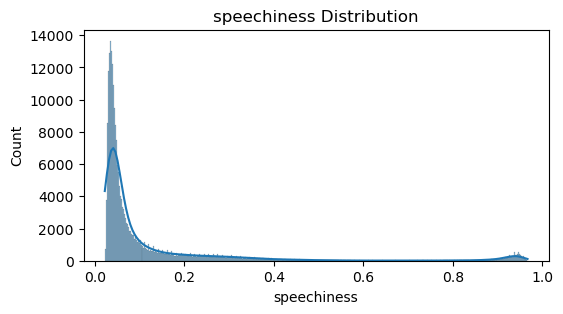

speechiness skewness: 3.31


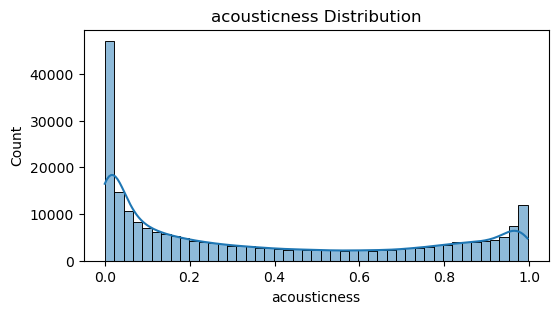

acousticness skewness: 0.53


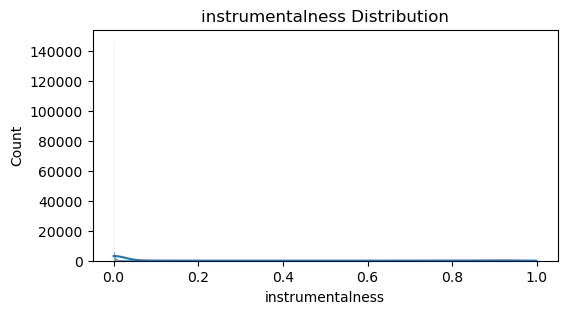

instrumentalness skewness: 1.82


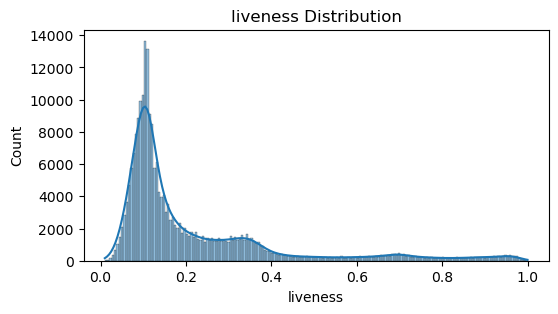

liveness skewness: 2.07


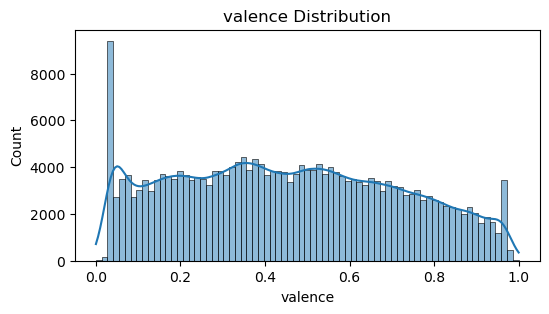

valence skewness: 0.14


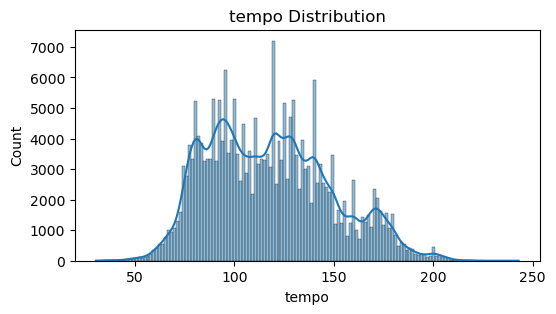

tempo skewness: 0.40


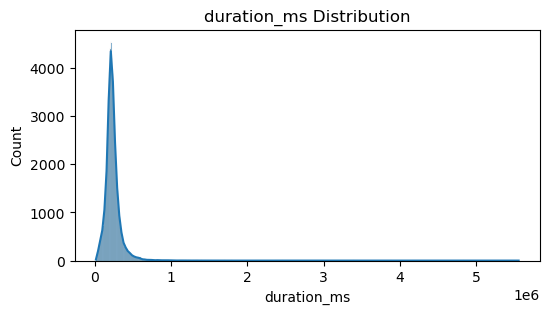

duration_ms skewness: 9.89


In [9]:
for col in new_df.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(new_df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

    skew = new_df[col].skew()
    print(f"{col} skewness: {skew:.2f}")


- The skewness of daceability= -0.38 which tells that it is almost normally distributed or zero skewed. We can infer that, most songs tend to be neither too danceable nor too non-danceable. Most of the tracks are in the middle range.
- energy skewness: -0.40 this shows a slight leftward skew. Most of the tracks have high energy with fewer tracks being low energy.This is great for playlists targeting active users, such as workout or party playlists.
- Loudness: Most tracks are on the louder side, with a few extremely quiet ones. So we could focus more on louder tracks for mainstream playlists while still include some quiet options for nice listeners.
- Most tracks have little or no speech.But we can also include podcast like content for users who enjoy that. 
- Features like acousticness, instrumentalness, liveness, valence, tempo, and duration don't show extreme values, but they still offer insight into creating more personalized playlists. We could target the acoustic and instrumental tracks for a more niche audience, while also including a mix of studio and live performances.

# Display summary statistics

In [10]:
print(new_df.describe())

        danceability         energy       loudness    speechiness  \
count  232725.000000  232725.000000  232725.000000  232725.000000   
mean        0.554364       0.570958      -9.569885       0.120765   
std         0.185608       0.263456       5.998204       0.185518   
min         0.056900       0.000020     -52.457000       0.022200   
25%         0.435000       0.385000     -11.771000       0.036700   
50%         0.571000       0.605000      -7.762000       0.050100   
75%         0.692000       0.787000      -5.501000       0.105000   
max         0.989000       0.999000       3.744000       0.967000   

        acousticness  instrumentalness       liveness        valence  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.368560          0.148301       0.215009       0.454917   
std         0.354768          0.302768       0.198273       0.260065   
min         0.000000          0.000000       0.009670       0.000000   
25%         0.0376

**The dataset contains tracks with a range of features, most of which are moderately danceable with an average value of 0.55 and energetic mean of 0.57, making them ideal for mainstream playlists like party or workout music. There is a slight preference for higher danceability, with most songs falling around the middle range. Loudness shows a broad variation, from very quiet to loud tracks, suggesting opportunities to create playlists that cater to different volume preferences. With speechiness being positively skewed with skewness of 3.31, it points to a growing market for podcast-style content, while acoustic and instrumental music also show demand, suggesting the potential for more playlists focused on these genres. The tempo values are relatively evenly spread out, which means we could create playlists tailored for various activities, like relaxing or exercising. The valence values also are moderately positive, indicating that most tracks have a positive mood, perfect for feel-good playlists.**

## Plotting Feature Distributions

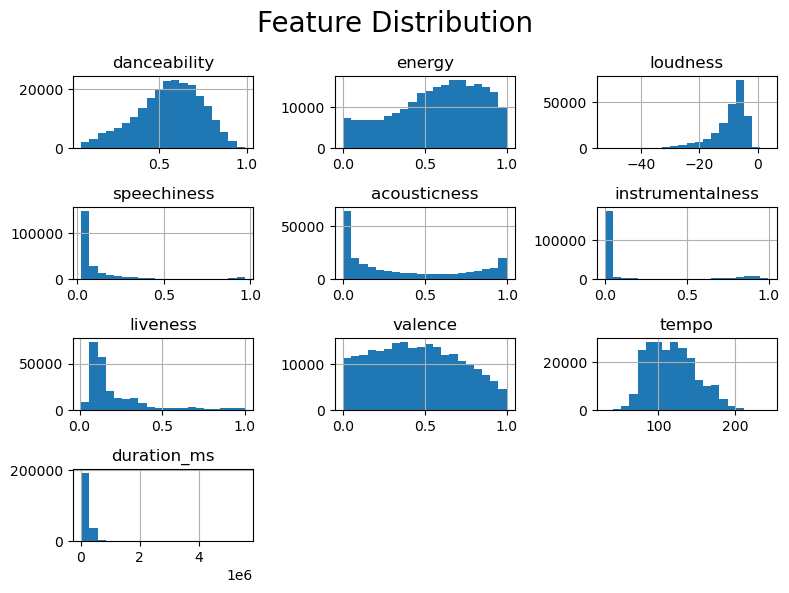

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

new_df.hist(bins=20,figsize=(8,6))
plt.suptitle('Feature Distribution',fontsize=20)
plt.tight_layout()
plt.show()


**The features don't appear to be Normalized also few of them look like they have already been scaled or normalized, as they appear between a range 0 to 1**

## Checking Correlation Matrix

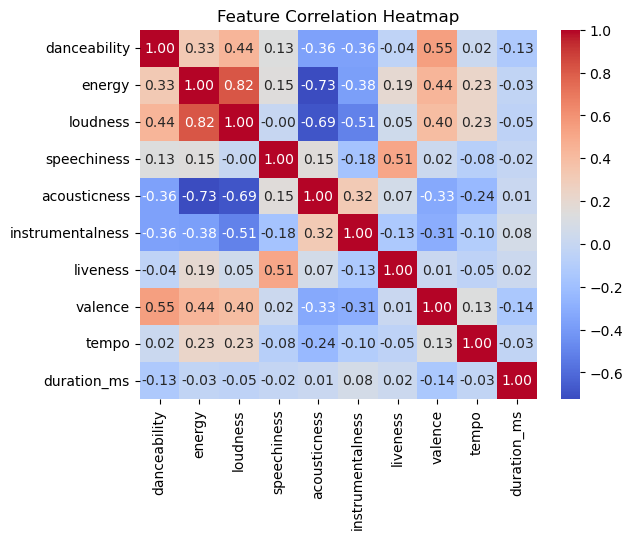

In [74]:
sns.heatmap(new_df.corr(),annot=True, fmt=".2f",cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

- Columns which show  Strong Positive Correlations are **[energy and loudness] , [valence and danceability] and
[speechiness and liveness]**
- Columns which show Strong Negative Correlations are **[acousticness and energy], [acousticness and loudness], [instrumentalness and loudness] and [danceability and instrumentalness]**
- The Columns like tempo and duration_ms show low correlations with most of the other features 

# Standardizing the Features 

As K-means is sensitive to scale , I will be using a StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler=StandardScaler()
scaled_data=scaler.fit_transform(new_df)

# Conversting the scaled data into a dataframe
scaled_df=pd.DataFrame(scaled_data,columns=new_df.columns)

In [76]:
scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.890935,1.286908,1.290703,-0.367970,0.683376,-0.489819,0.660661,1.380744,1.595607,-1.141368
1,0.191994,0.630249,0.668683,-0.183082,-0.345467,-0.489819,-0.322835,1.388435,1.823253,-0.821867
2,0.585296,-1.669954,-0.718402,-0.455832,1.644570,-0.489819,-0.564927,-0.334212,-0.588326,-0.545298
3,-1.693703,-0.929789,-0.434817,-0.438044,0.942701,-0.489819,-0.587623,-0.876384,1.750597,-0.695295
4,-1.203422,-1.313157,-1.930601,-0.405163,1.638932,-0.083566,-0.065613,-0.249618,0.741433,-1.282184


# Saving the dataframe as csv

In [77]:
scaled_df.to_csv(r"C:\Users\Tanvi\Desktop\Datasets/spotify_scaled_features1.csv", index=False)